# K-Means (Bank Data)

bank client data:
    
    1 - age (numeric)
    
    2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
    
    3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
    
    4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
    
    5 - default: has credit in default? (categorical: 'no','yes','unknown')
    
    6 - housing: has housing loan? (categorical: 'no','yes','unknown')
    
    7 - loan: has personal loan? (categorical: 'no','yes','unknown')
    
    # related with the last contact of the current campaign:
    
    8 - contact: contact communication type (categorical: 'cellular','telephone')
    
    9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
    
    10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
    
    11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
    
    # other attributes:
    
    12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
    
    13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
    
    14 - previous: number of contacts performed before this campaign and for this client (numeric)
    
    15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
    
    # social and economic context attributes
    
    16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
    
    17 - cons.price.idx: consumer price index - monthly indicator (numeric)
    
    18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
    
    19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
    
    20 - nr.employed: number of employees - quarterly indicator (numeric)
    
    21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv("bank-full.csv")

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.shape

(41188, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


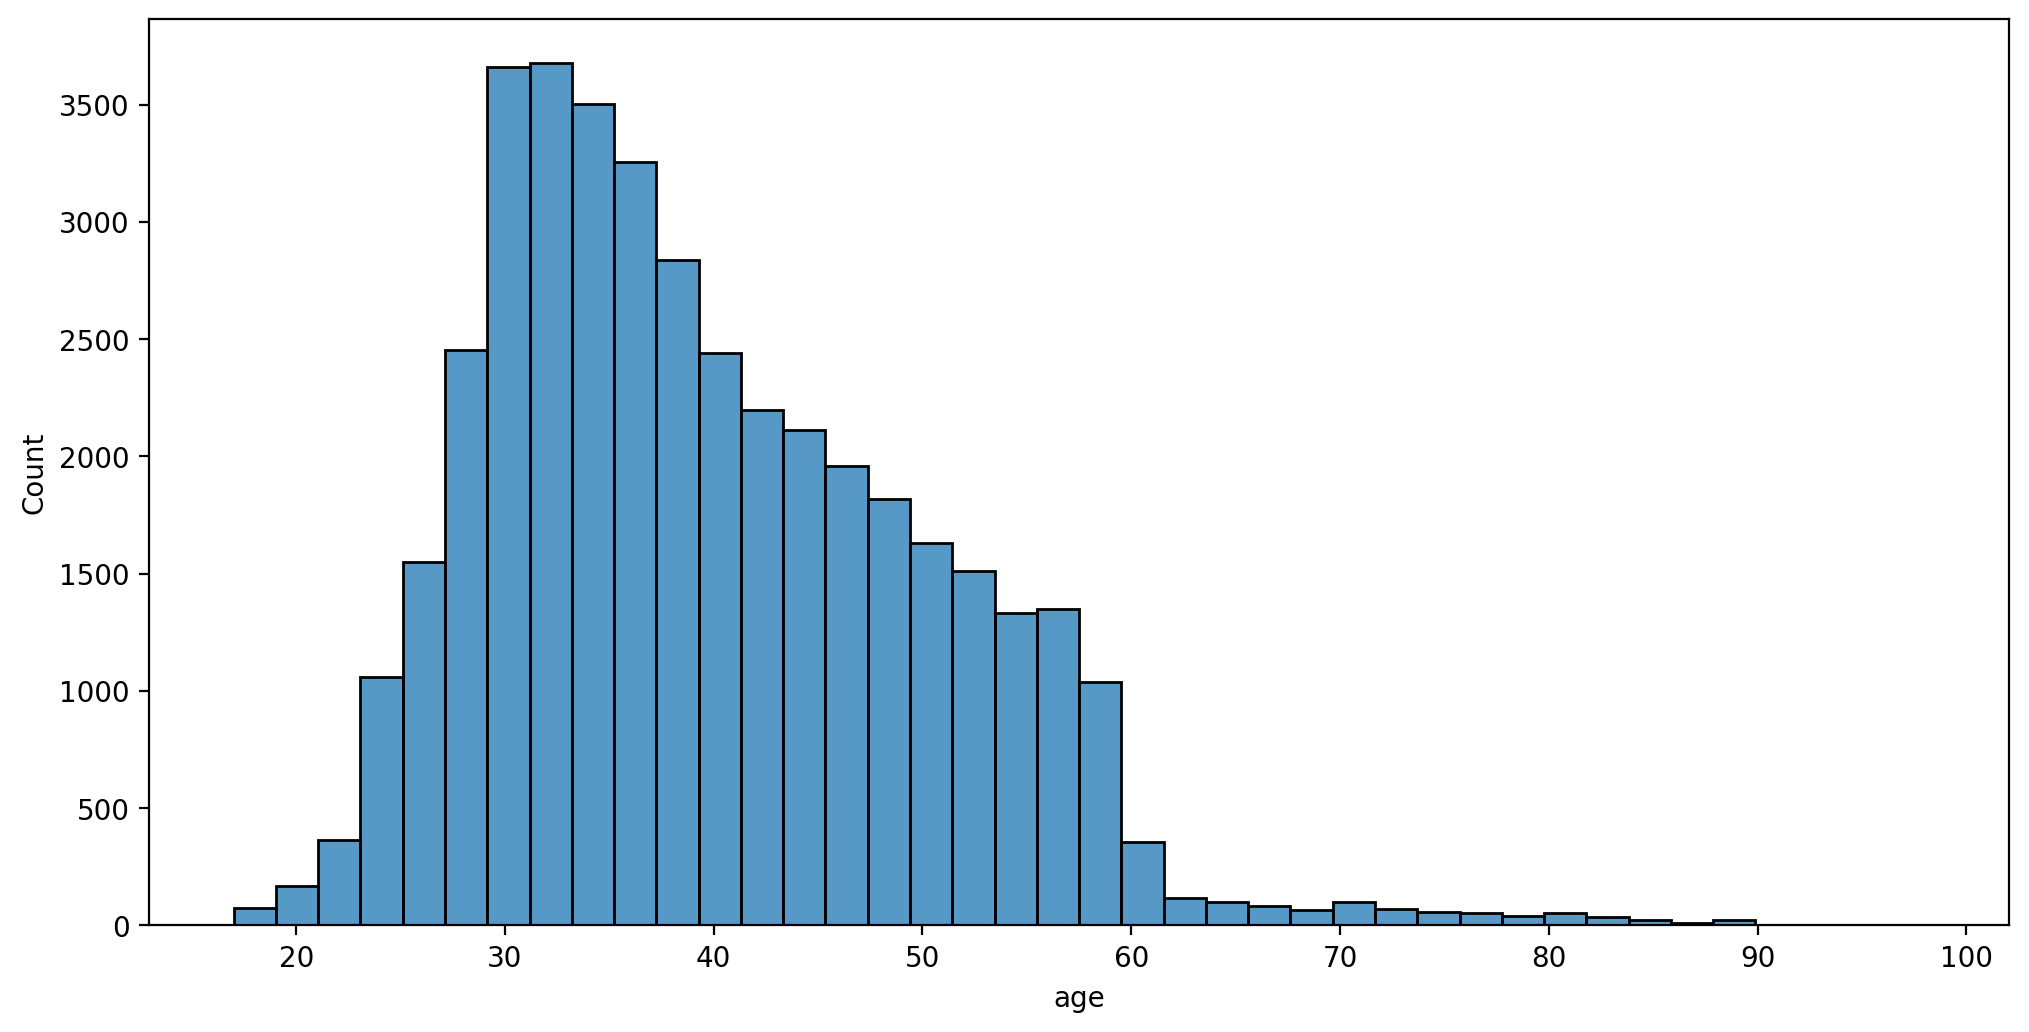

In [13]:
# Distribution of "age":

plt.figure(figsize= (12,6), dpi= 200)
sns.histplot(data= df, x= "age", bins= 40)
plt.show()

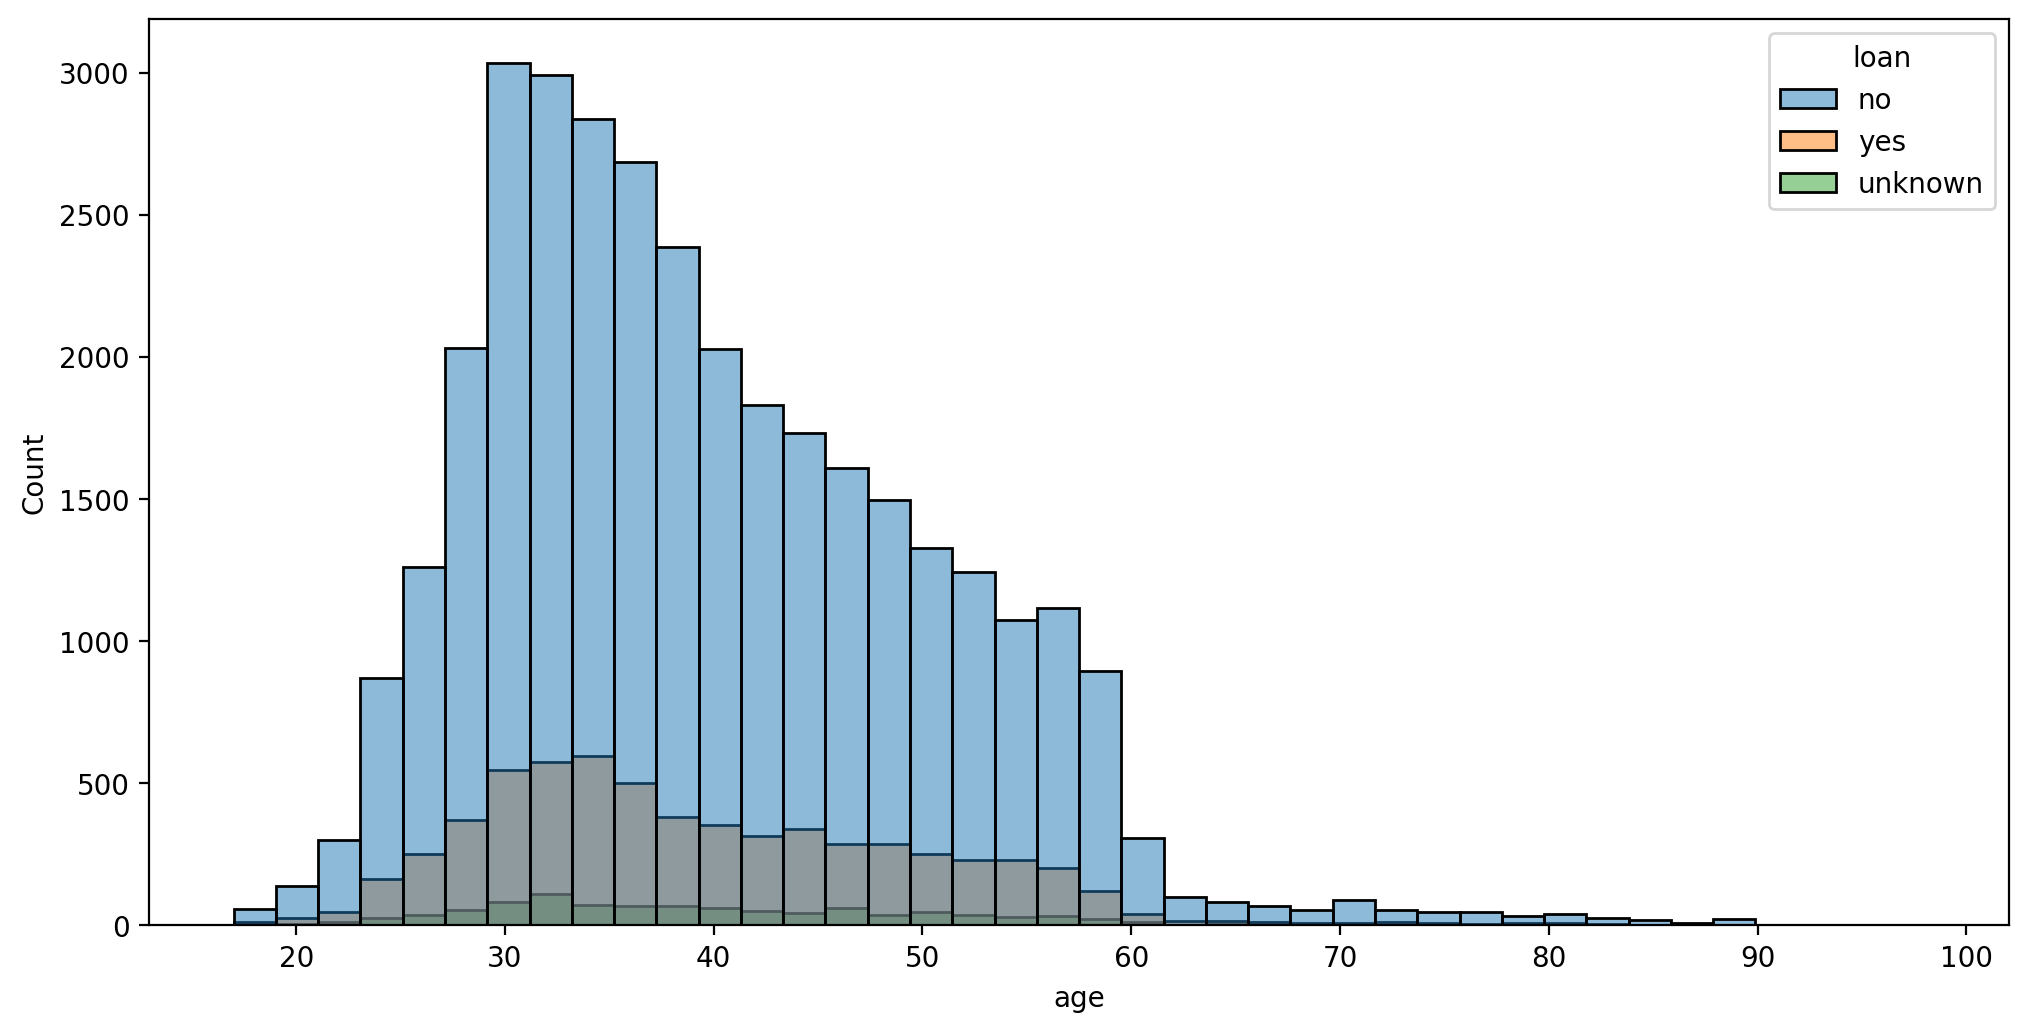

In [14]:
# Distribution of "age" vs "loan":

plt.figure(figsize= (12,6), dpi= 200)
sns.histplot(data= df, x= "age", hue= "loan", bins= 40)
plt.show()

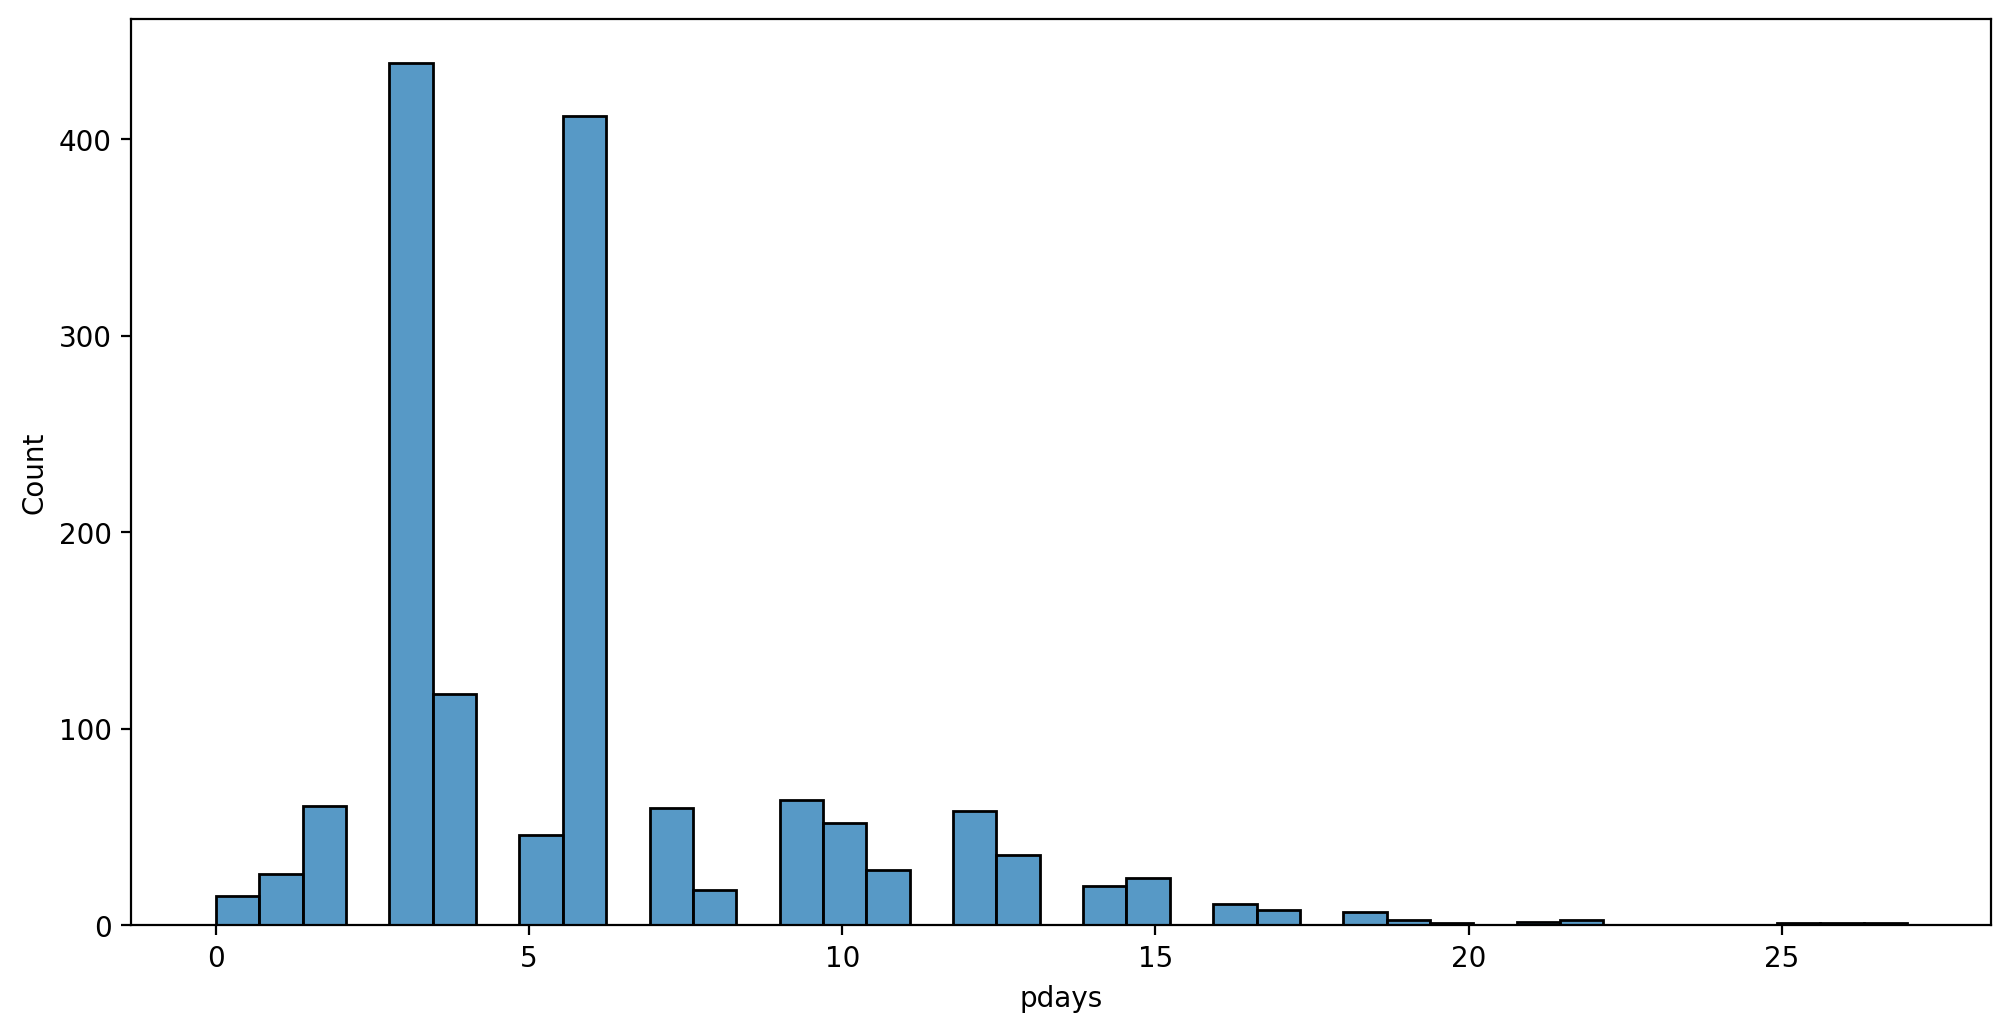

In [16]:
# Distribution of "pdays":

plt.figure(figsize= (12,6), dpi= 200)
sns.histplot(data= df[df["pdays"] != 999], x= "pdays") # "pdays = 999 means customer was not contacted previously"
plt.show()

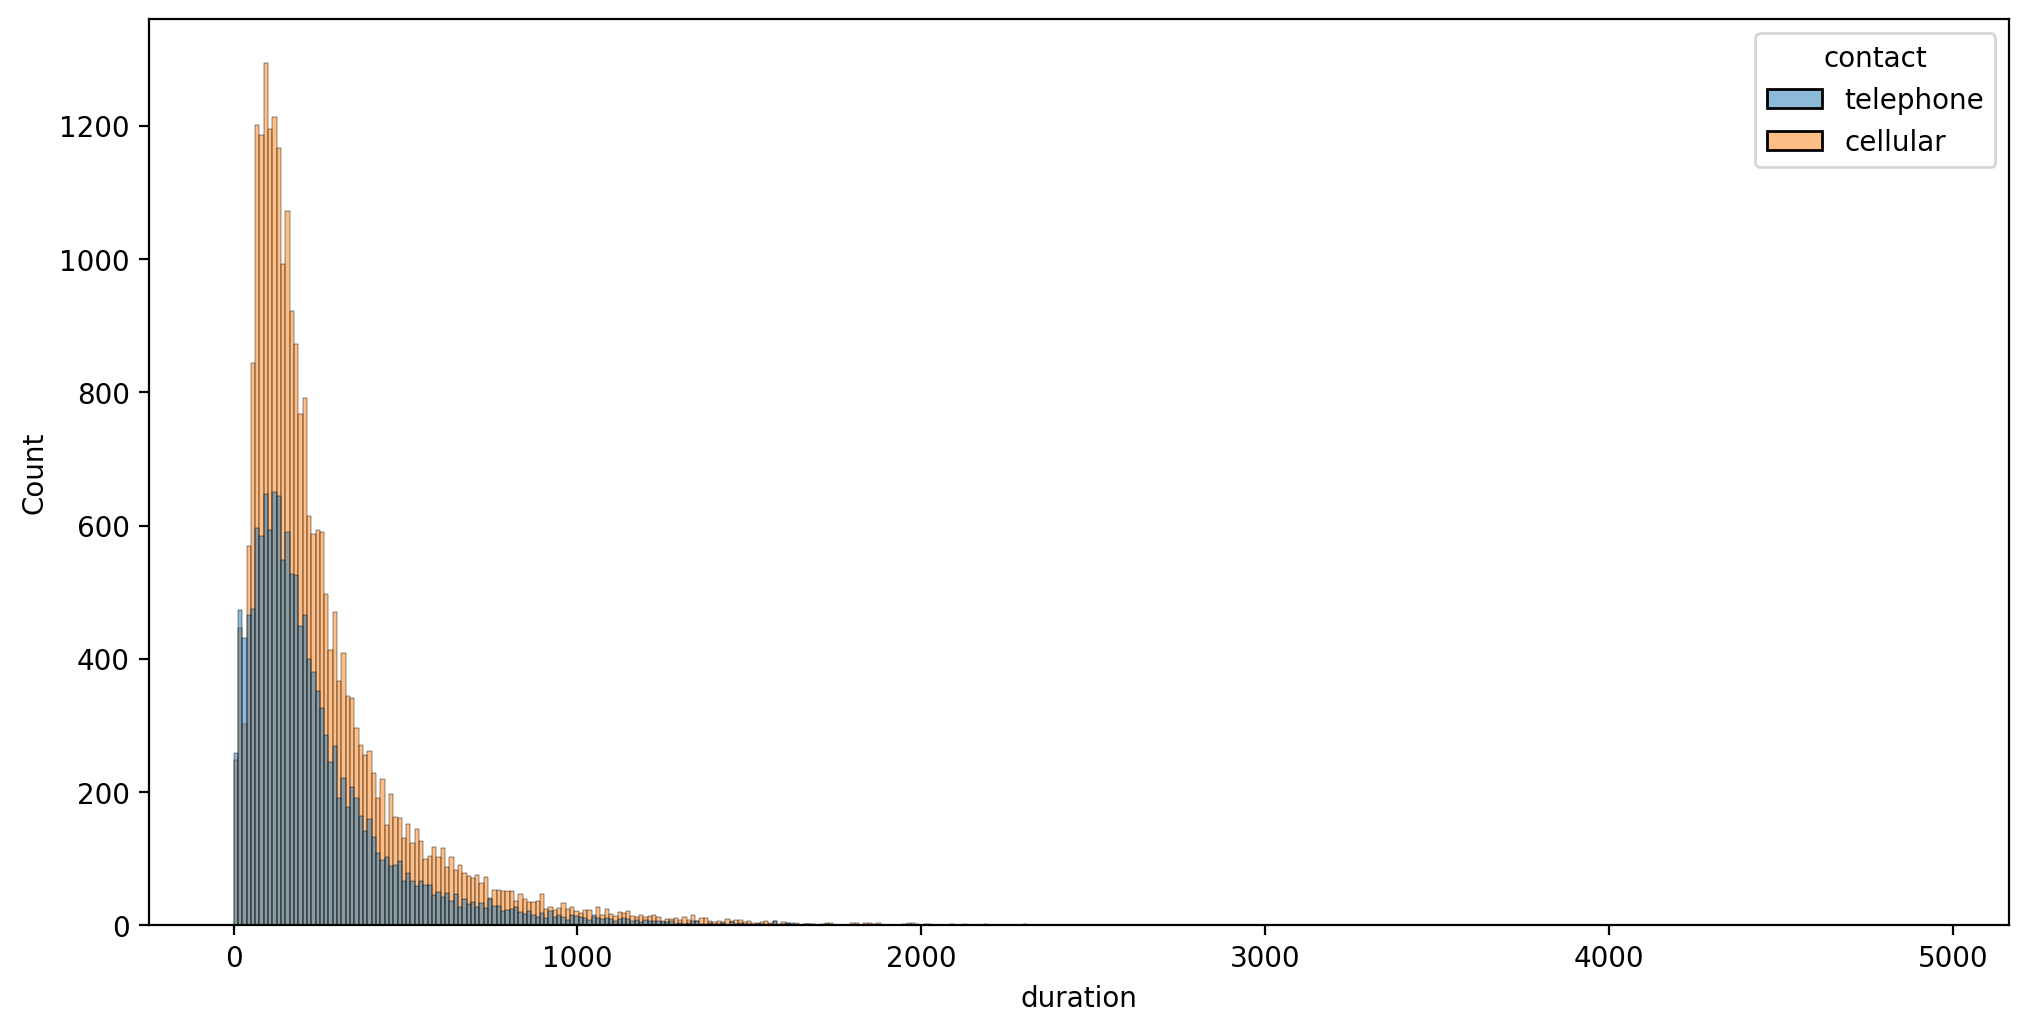

In [17]:
# Distribution of "duration" vs "contact":

plt.figure(figsize= (12,6), dpi= 200)
sns.histplot(data= df, x= "duration", hue= "contact")
plt.show()

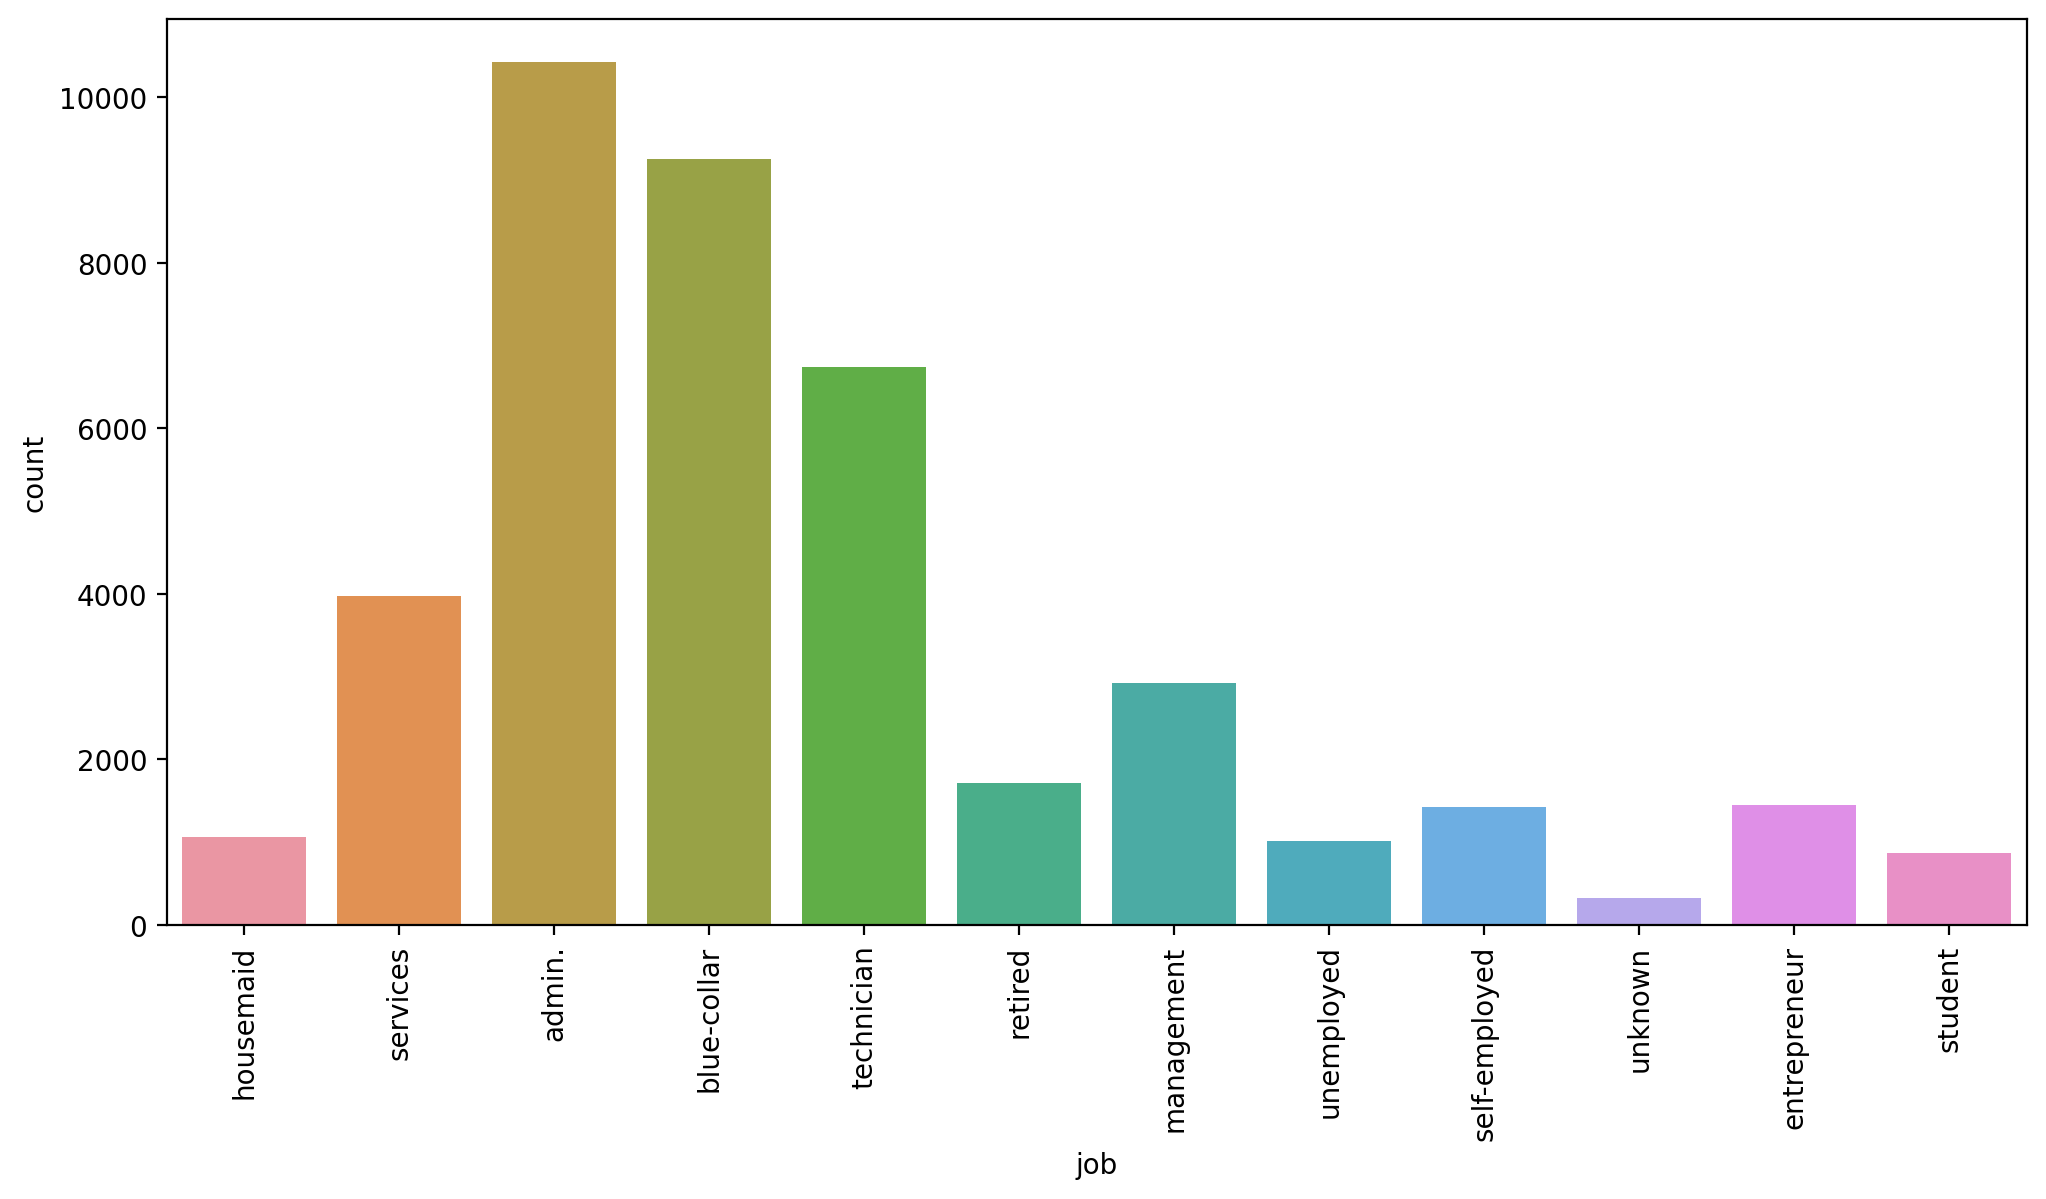

In [19]:
# Different Kinds of "job":

plt.figure(figsize= (12,6), dpi= 200)
sns.countplot(data= df, x= "job")
plt.xticks(rotation= 90)
plt.show()

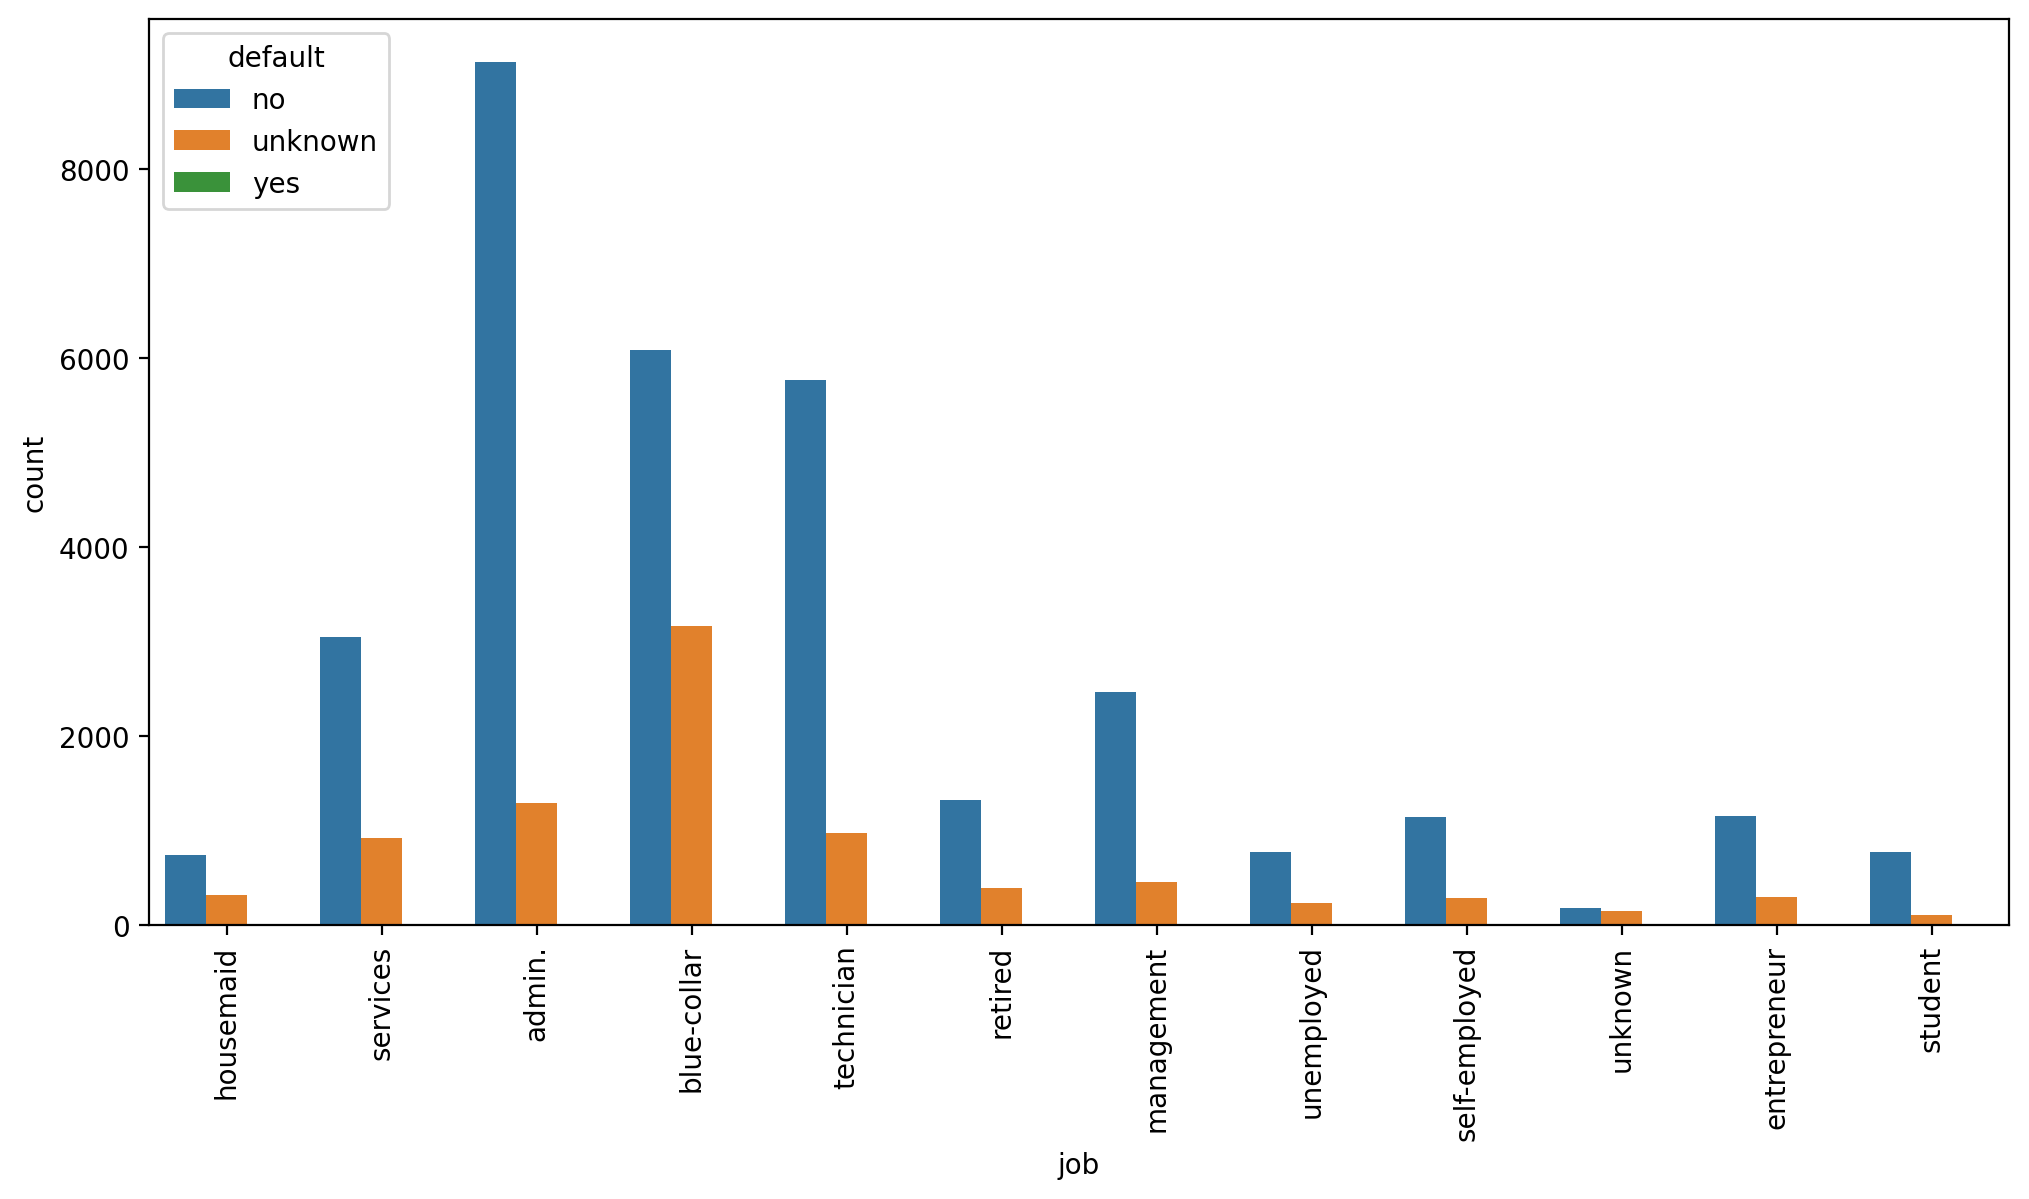

In [20]:
plt.figure(figsize= (12,6), dpi= 200)
sns.countplot(data= df, x= "job", hue= "default")
plt.xticks(rotation= 90)
plt.show()

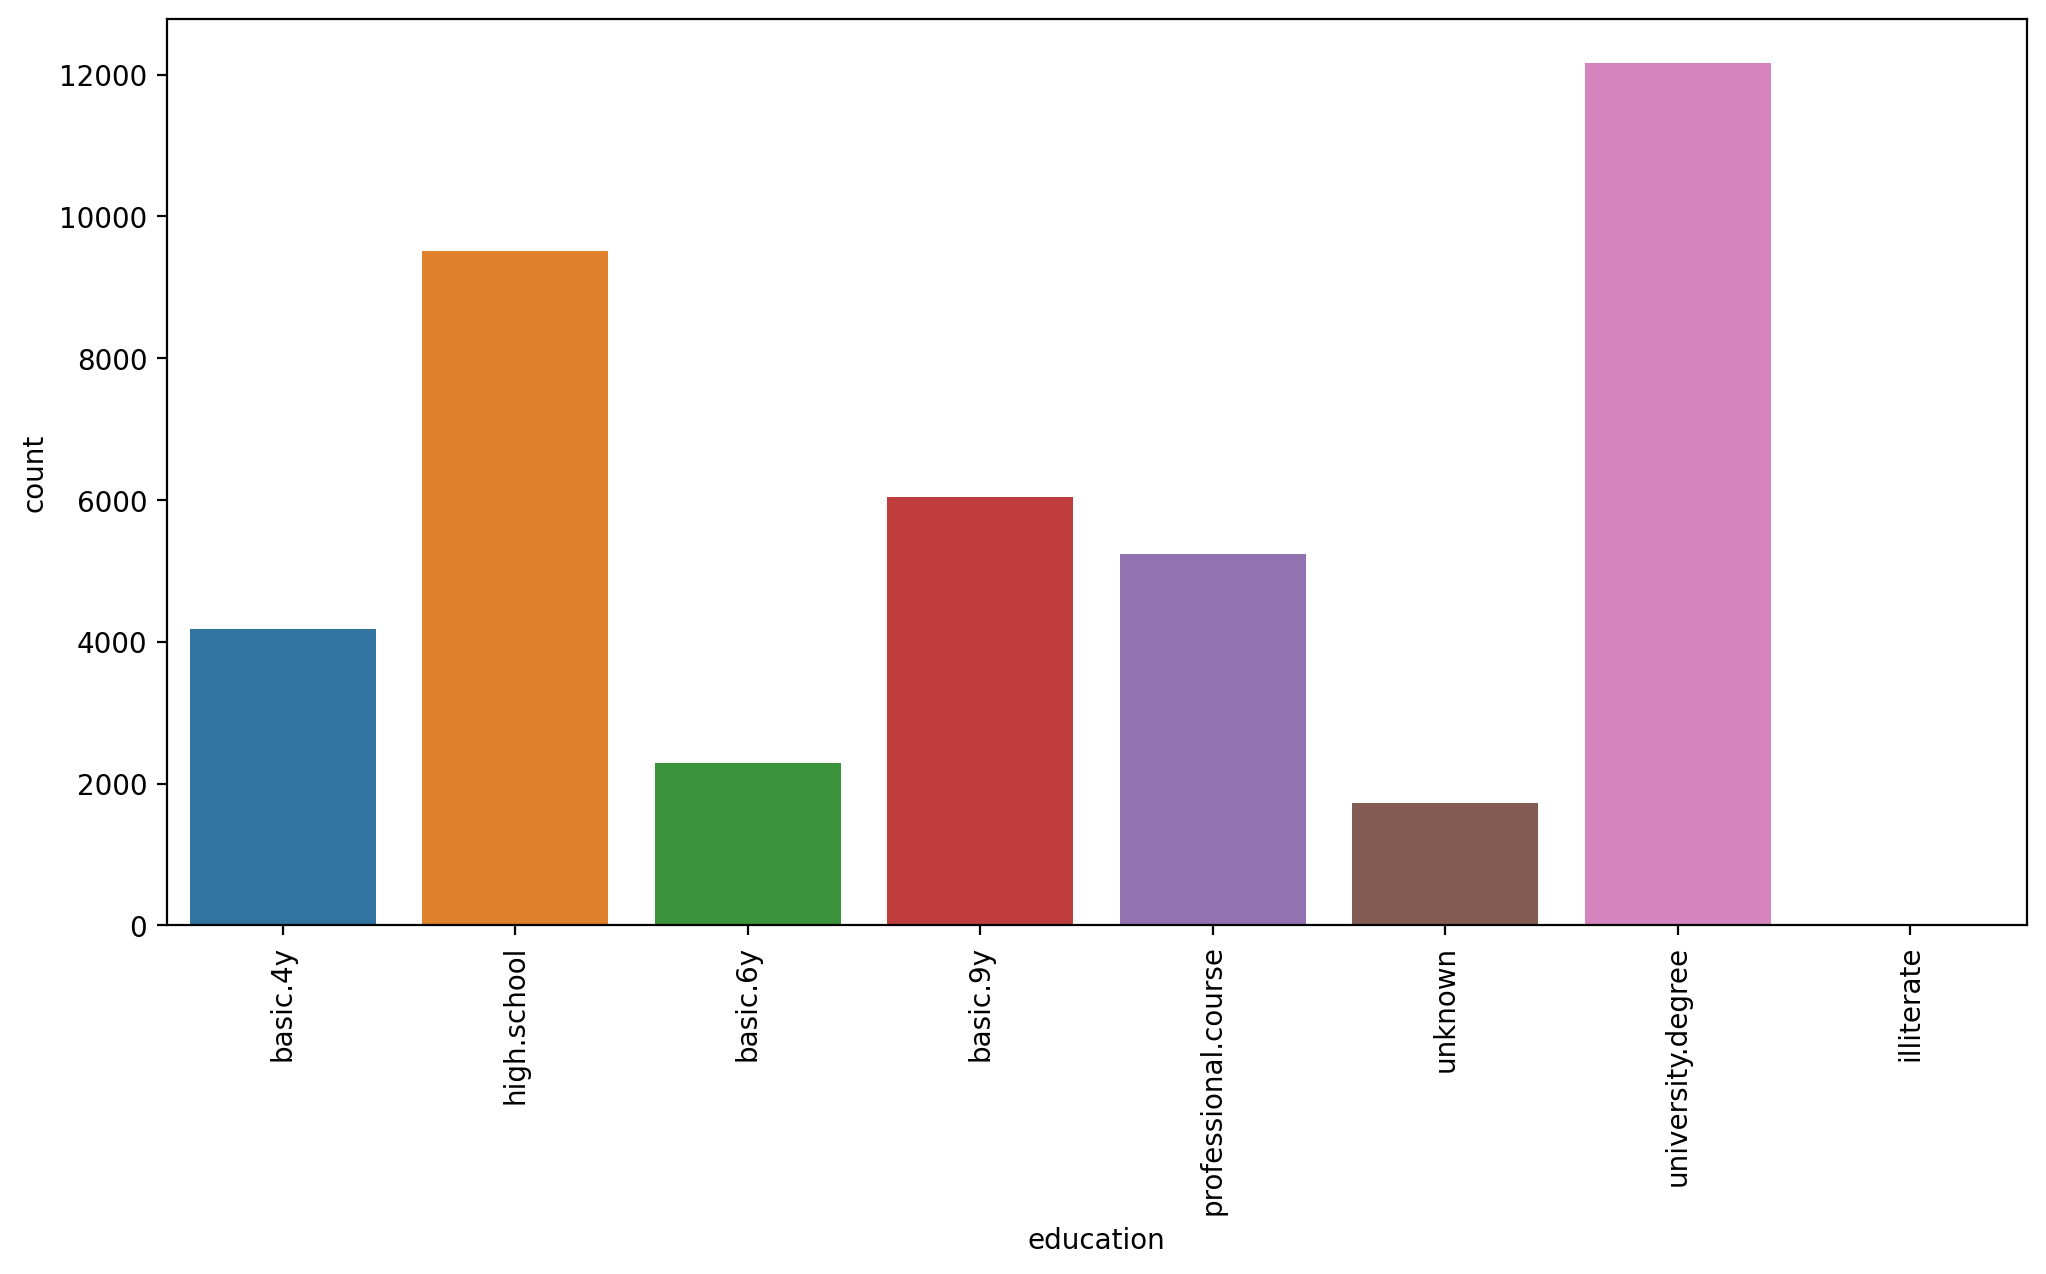

In [21]:
# Different "education" levels:

plt.figure(figsize= (12,6), dpi= 200)
sns.countplot(data= df, x= "education")
plt.xticks(rotation= 90)
plt.show()

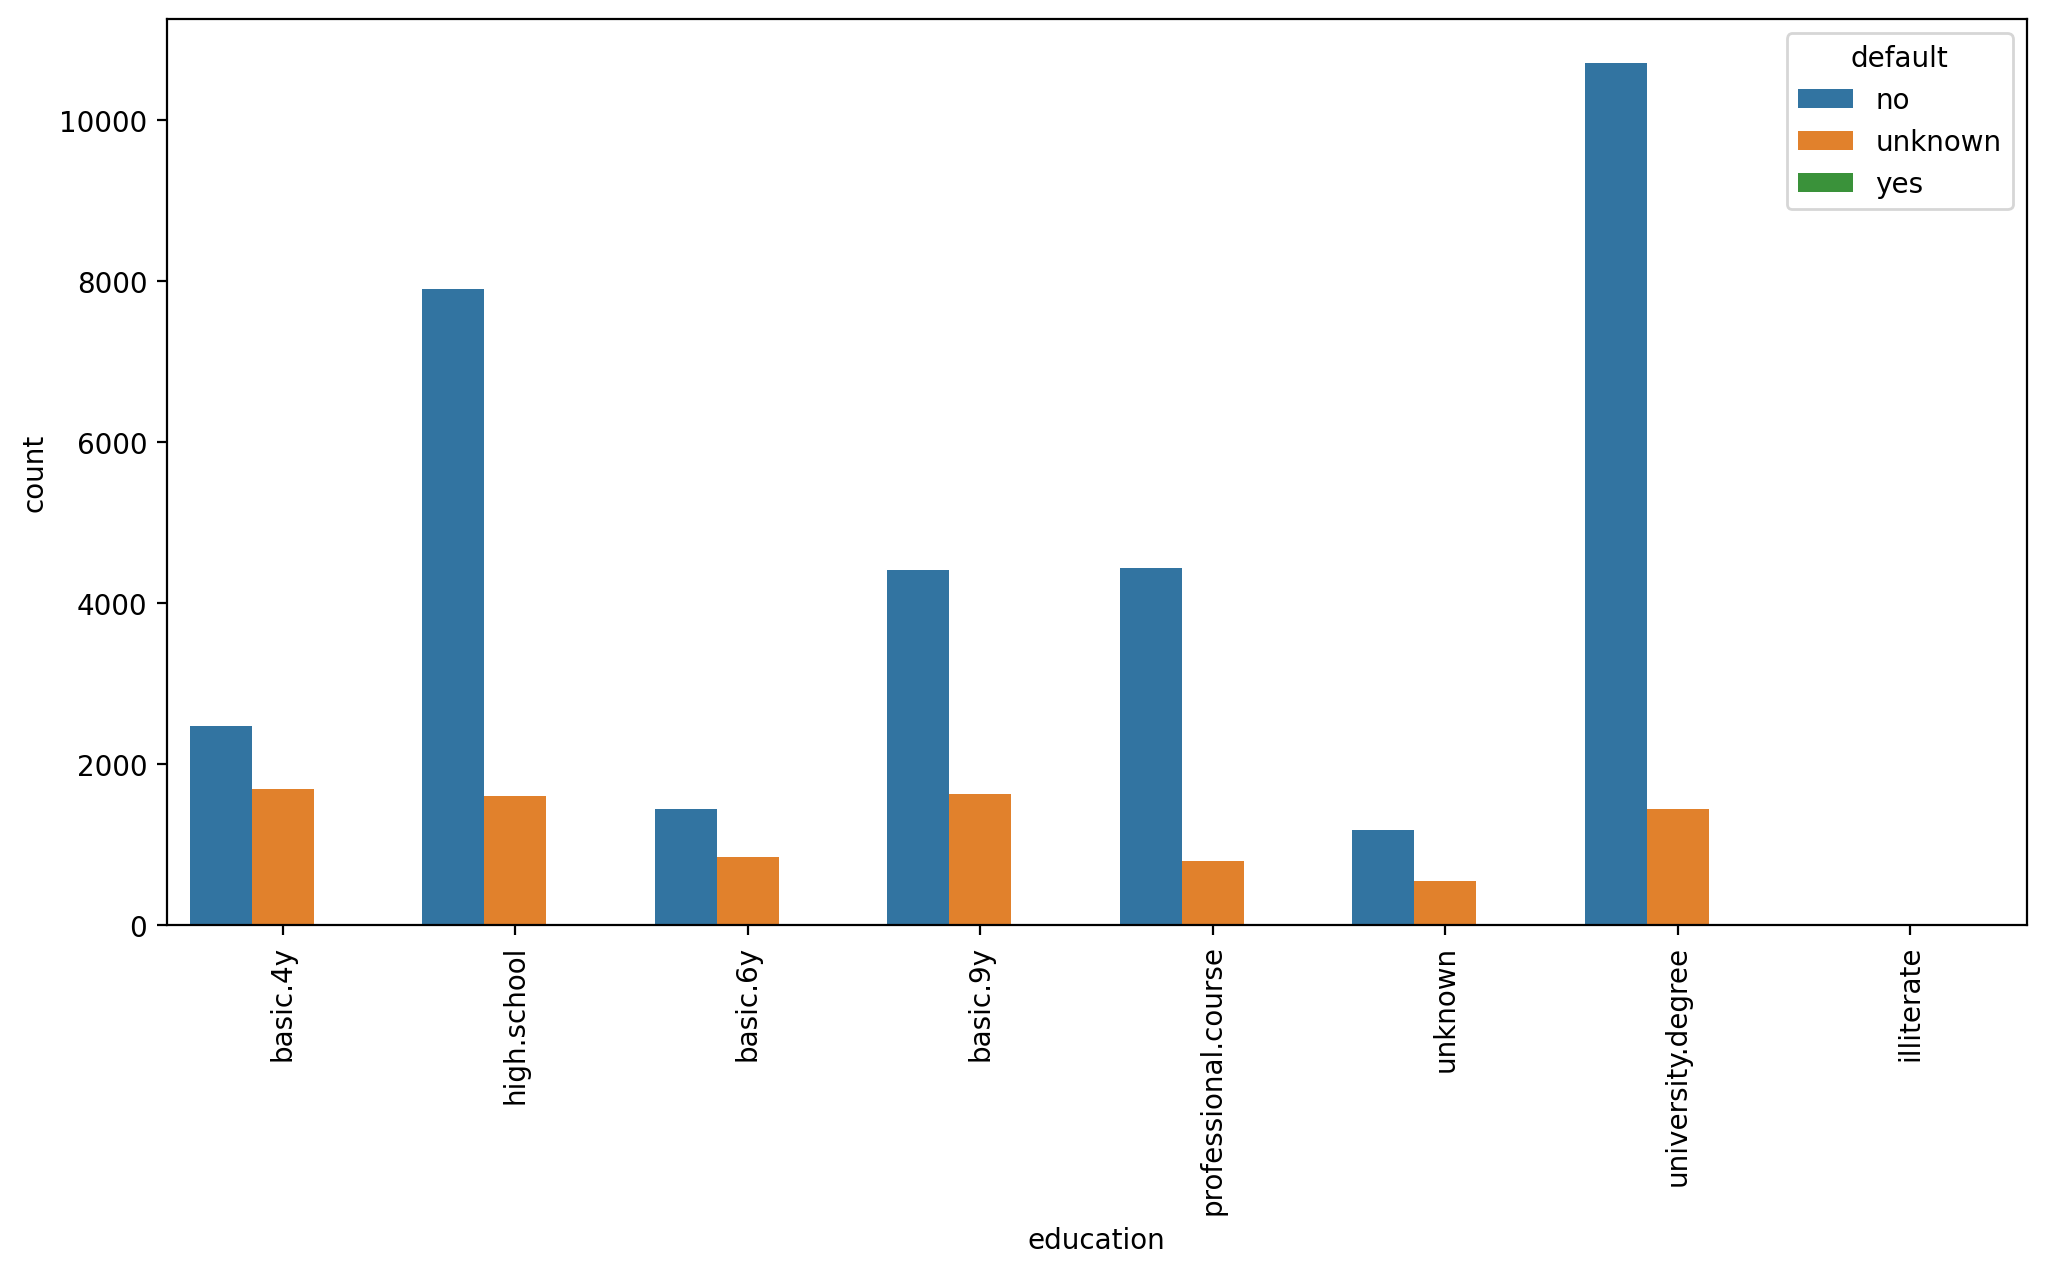

In [22]:
# Different "education" levels:

plt.figure(figsize= (12,6), dpi= 200)
sns.countplot(data= df, x= "education", hue= "default")
plt.xticks(rotation= 90)
plt.show()

### Dummy variables for Categorical Variables:

In [23]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [24]:
x = pd.get_dummies(df, drop_first= True)

In [25]:
x.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,subscribed_yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,1,0,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,1,0,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,1,0,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,1,0,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,1,0,0


### Scalling:

In [26]:
sc= StandardScaler()

In [27]:
temp = sc.fit_transform(x)
x = pd.DataFrame(temp, columns= x.columns)
x.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,subscribed_yes
0,1.533034,0.010471,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,-0.332532,-0.133197,-0.118462,1.959,-0.514581,-0.494394,-0.496067,0.397706,-0.1857,-0.356309
1,1.628993,-0.421501,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,-0.332532,-0.133197,-0.118462,1.959,-0.514581,-0.494394,-0.496067,0.397706,-0.1857,-0.356309
2,-0.290186,-0.124520,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,-0.332532,-0.133197,-0.118462,1.959,-0.514581,-0.494394,-0.496067,0.397706,-0.1857,-0.356309
3,-0.002309,-0.413787,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,-0.332532,-0.133197,-0.118462,1.959,-0.514581,-0.494394,-0.496067,0.397706,-0.1857,-0.356309
4,1.533034,0.187888,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,-0.332532,-0.133197,-0.118462,1.959,-0.514581,-0.494394,-0.496067,0.397706,-0.1857,-0.356309


### Finding Optimal Number of Cluster using Inertia and Silhouette Score:

In [29]:
inertia_list = []
sil_score = []

for k in range(2,11):
    
    kmc = KMeans(n_clusters= k)
    
    clusters = kmc.fit_predict(x)
    
    inertia_list.append(kmc.inertia_)
    
    sil_score.append(silhouette_score(x, clusters))

In [30]:
inertia_list

[2042697.9644462783,
 1947279.2796644154,
 1873617.373163856,
 1818496.1642129868,
 1744272.7100180788,
 1722976.941177596,
 1651956.0904616625,
 1628055.652942812,
 1588217.0198607715]

In [31]:
sil_score

[0.1232284773546577,
 0.10304660474346578,
 0.06588157375562584,
 0.0737426121229763,
 0.08173237386969902,
 0.0731358026785118,
 0.09640602121629263,
 0.10153048813368565,
 0.10138972628780939]

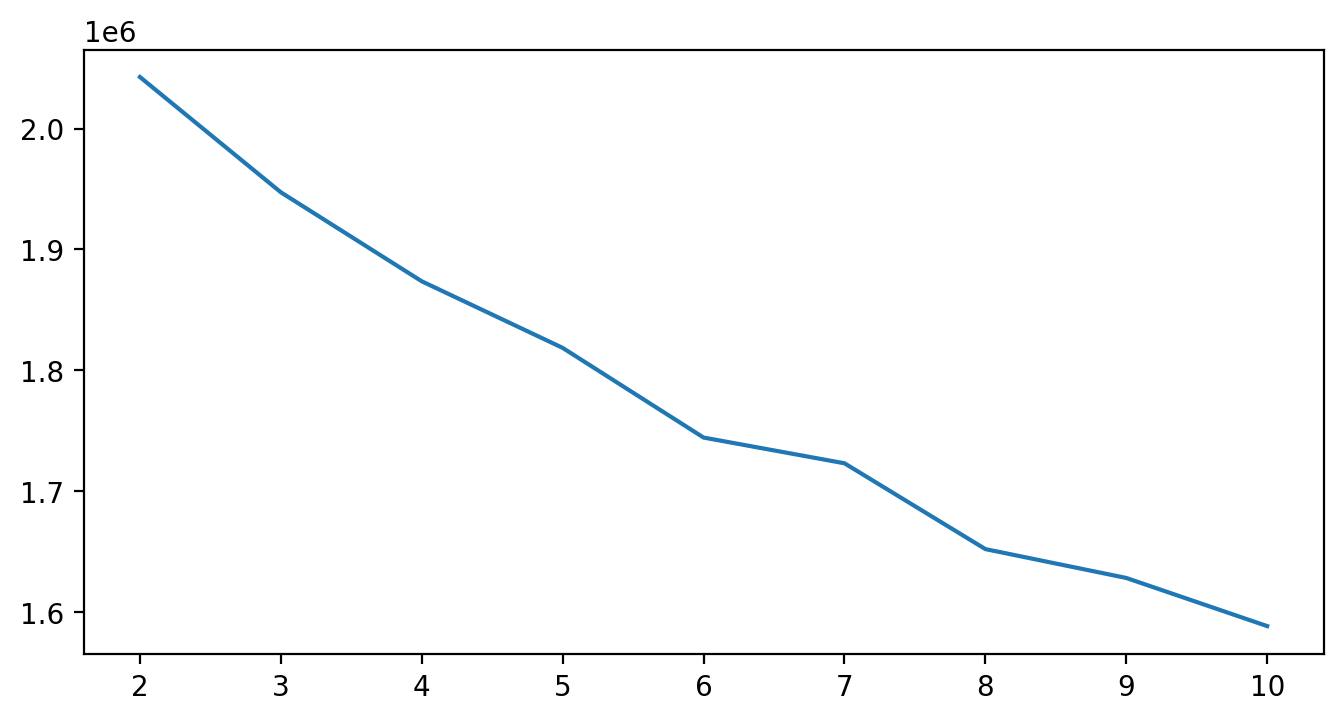

In [34]:
plt.figure(figsize= (8,4), dpi= 200)
plt.plot(range(2,11), inertia_list)
plt.show()

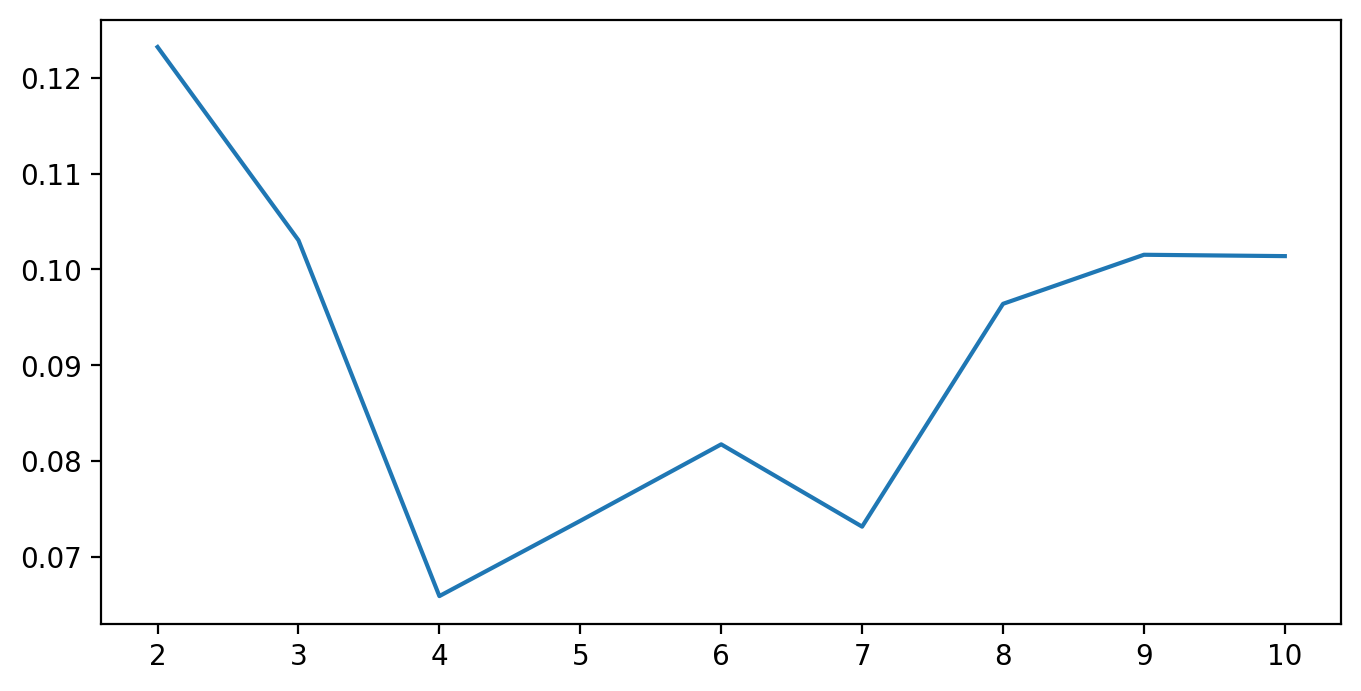

In [35]:
plt.figure(figsize= (8,4), dpi= 200)
plt.plot(range(2,11), sil_score)
plt.show()

In [36]:
# 3 or 6 clusters seem like best options for us here.